In [1]:
from qutip import *
from qutip.qip.operations import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#brute force the alpha beta, no lindblad evolution

# Creating arbitrary state

In [3]:
#def genstate():
    #every run of this cell will generate new alpha beta
#    alpha = np.random.random()
#    beta = np.sqrt(1-alpha**2)
#    print('alpha =',alpha)#, '\nbeta =', beta), '\ncheck=', alpha**2+beta**2)
#    return(alpha, beta)


In [4]:
#every run of this cell will generate new alpha beta
alpha = np.random.random()
beta = np.sqrt(1-alpha**2)
print('alpha =',alpha)#, '\nbeta =', beta), '\ncheck=', alpha**2+beta**2)

alpha = 0.61236854025029


In [5]:
beta

0.7905724324258524

In [6]:
#creating sys env joint state psi
e = basis(2,1)
g = basis(2,0)
sys = (alpha*basis(2,0) + beta*basis(2,1)).unit()
env = basis(2,0)
psi = tensor(sys,g)
rho = psi*psi.dag()

# Making Zs operator and SWAP

In [134]:
#Zs operator
theta = 0.01
#weak_sz = np.exp(np.imag*sigmaz()*theta/2)
weak_sz = qeye(2) * np.cos(theta/2) + 1*sigmaz() * np.sin(theta/2)
Z = tensor(weak_sz, qeye(2))

#Ucnot operator
weak_sw = tensor(qeye(2),qeye(2)) * np.cos(theta) + 1* swap() * np.sin(theta)

#Hamiltonian
H = Z*weak_sw

# Measurement operators

In [135]:

proj0 = g * g.dag()
proj1 = e * e.dag()

#operators used to change state to post measurement state
m0 = tensor(qeye(2), proj0)
m1 = tensor(qeye(2), proj1)

#operators used to find prob of alpha,beta
n0 = tensor(proj0, qeye(2))
n1 = tensor(proj1, qeye(2))
#psiH for practice, can delete later
psiH = (H*psi).unit()


In [136]:
psiH

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.26755502]
 [0.00973209]
 [0.96349343]
 [0.        ]]

In [137]:
m0*psiH

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.26755502]
 [0.        ]
 [0.96349343]
 [0.        ]]

In [138]:
m1*psiH

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.        ]
 [0.00973209]
 [0.        ]
 [0.        ]]

# Creating post measurement state for each possible outcome and tensoring new env qubit and repeating.

In [139]:
p0 = 0
p1 = 0

In [140]:
0.969**2+0.066**2

0.943317

In [141]:
p0 = expect(m0,psiH)
p0

0.9999052863643455

In [142]:
p1 = expect(m1,psiH)
p1

9.471363565463503e-05

In [143]:
0.406**2

0.164836

In [152]:
arr_e0_s0 = []
arr_e0_s1 = []
arr_e1_s0 = []
arr_e1_s1 = []

tlist = []
psit0 = psi

#set probs, based on probs do evolution of state. Currently state evolves with m0 by default and thats how a and b are 
#being calculated
n = 500
for i in range(0,n):
    tlist = tlist + [i]
    #expectation value of m0 and m1
    #interact with ZUcnot
    psiH = (H*psit0).unit()
    #prob of no jump and yes jump
    p0 = expect(m0,psiH)
    p1 = 1-p0
    #create RNG number r
    r = np.random.random()
    #no jump case
    if(r<p0):
        #measure env 0, new state with env 0
        psit0 = (m0*psiH).unit()
        #measure sys 0
        e0_s0 = expect(n0,psit0)
        arr_e0_s0 = arr_e0_s0 + [e0_s0]
        #measure sys 1
        e0_s1 = expect(n1,psit0)
        arr_e0_s1 = arr_e0_s1 + [e0_s1]
        psit0 = tensor((psit0[0][0][0]*g + psit0[2][0][0]*e), g) 
        continue
    else:
        #measure env 1, new state w env 1
        psit0 = (m1*psiH).unit()
        #measure sys 0
        e1_s0 = expect(n0,psit0)
        arr_e0_s0 = arr_e0_s0 + [e1_s0]
        #measure sys 1
        e1_s1 = expect(n1,psit0)
        arr_e0_s1 = arr_e0_s1 + [e1_s1]
        break
    #reinitialize, adds new env qubit

In [153]:
#print(e0_s0, '\n', e0_s1, '\n', e1_s0, '\n', e1_s1, '\n', psi0, psi1, psiH)

In [7]:
[0]*100

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [154]:
r<p0

True

In [155]:
r

0.5579341252054241

In [156]:
len(tlist)

500

In [157]:
arr_e0_s1

[0.928407532031323,
 0.9257096287864683,
 0.9229184983364933,
 0.920031562386239,
 0.9170462203803544,
 0.913959853475048,
 0.9107698288752802,
 0.9074735045510194,
 0.9040682343452758,
 0.9005513734855979,
 0.8969202845094052,
 0.8931723436120116,
 0.8893049474244548,
 0.8853155202261982,
 0.881201521595503,
 0.876960454497681,
 0.8725898738085891,
 0.8680873952675777,
 0.8634507048506355,
 0.8586775685507612,
 0.8537658425485372,
 0.8487134837515935,
 0.8435185606770623,
 0.8381792646463384,
 0.8326939212564122,
 0.8270610020868705,
 0.8212791365963029,
 0.8153471241564351,
 0.8092639461668514,
 0.8030287781877283,
 0.7966410020226803,
 0.7901002176786432,
 0.7834062551248282,
 0.7765591857682126,
 0.769559333558899,
 0.7624072856350972,
 0.7551039024144816,
 0.7476503270364583,
 0.7400479940584245,
 0.7322986373085897,
 0.7244042967983942,
 0.7163673245991155,
 0.7081903895899162,
 0.6998764809884775,
 0.6914289105804453,
 0.68285131357028,
 0.6741476479836991,
 0.6653221925607283,


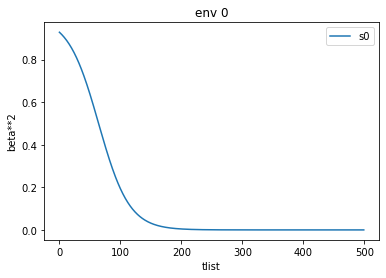

In [158]:
plt.figure()
plt.plot(tlist,arr_e0_s1)
plt.title('env 0')
plt.xlabel('tlist')
plt.ylabel('beta**2')
plt.legend(('s0', 's1'))

In [159]:
# need to figure out how to introduced 2nd environment qubit onwards. 
# Not sure if mesolve or mcsolve is being used correctly
# the state H*psi
#figure out pre and post measurement state. then we can tensor on the next env qubit and repeat. 
#try recursion on eqn 66
#check if measurement works by writing a simple 1/root2 0 + 1/root2 1